## Problem Statement:-
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [166]:
#importing necessary librarires
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import warnings
import joblib
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('census_income.csv')

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


1.object type columns are to be encoded                                                                                     
2.There are no null values present in the dataset

In [8]:
## Again checking null value:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

again we can see that there are no null values present in the dataset

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Exploratory data analysis

In [ ]:
Workclass,Occupation,Native_country

In [11]:
col =['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for i in col:
    print(f"{i}:")
    print(df[i].value_counts())
    print("\n")

Workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Marital_status:
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


Occupation:
 Prof-specialt

1.'?' is present in Workclass,Occupation,Native_country                                                                     
2.Income  is our target column with two values and we see that the dataset is imbalanced

# Univariate Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Categorical Columns

In [13]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [32]:
#we can create a column 'IncomeLevel' to understand attrition in betterway
attr_map={' <=50K':0,' >50K':1}
df['IncomeLevel']=df['Income'].map(attr_map)

### Workclass

In [15]:
pd.crosstab(df['Workclass'],df['Income'])

Income,<=50K,>50K
Workclass,,
?,1645,191
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,944,353
Without-pay,14,0


In [34]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

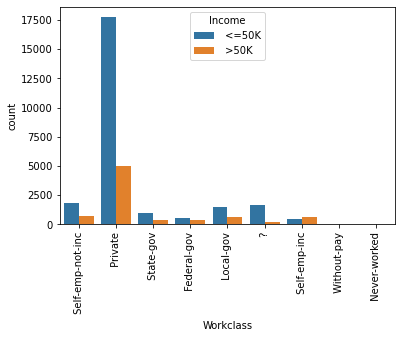

In [36]:
sns.countplot(df['Workclass'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

We see that Private work class is more in number

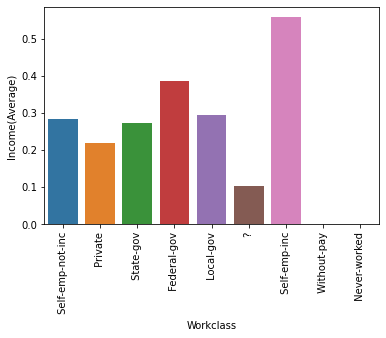

In [37]:
sns.barplot(x='Workclass',y='IncomeLevel',data=df,ci=None)
plt.ylabel('Income(Average)')
plt.xticks(rotation=90)
plt.show()

64% of Self-emp-inc people getting >50K income

In [ ]:
### Education 

In [35]:
pd.crosstab(df['Education'],df['Income'])

Income,<=50K,>50K
Education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


In [38]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

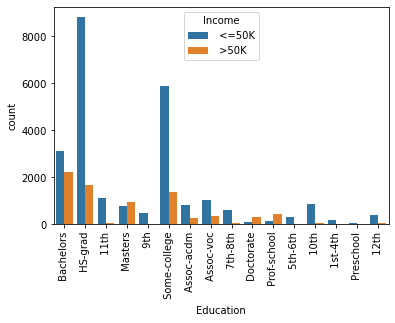

In [40]:
sns.countplot(df['Education'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

Mostof the employees are HS-grad

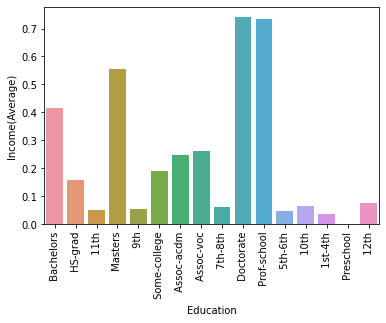

In [41]:
sns.barplot(x='Education',y='IncomeLevel',data=df,ci=None)
plt.ylabel('Income(Average)')
plt.xticks(rotation=90)
plt.show()

an average 75% of Employees with Doctorate eductation receive >50k income followed by Prof-school around 72%

In [ ]:
### Marital_status

In [42]:
pd.crosstab(df['Marital_status'],df['Income'])

Income,<=50K,>50K
Marital_status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10191,491
Separated,959,66
Widowed,908,85


In [43]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

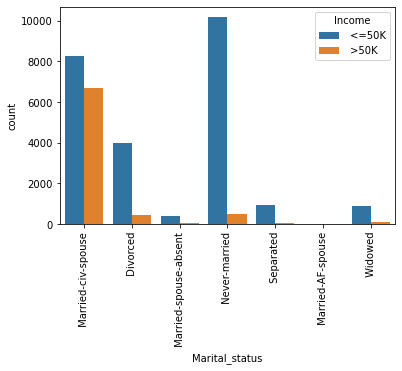

In [44]:
sns.countplot(df['Marital_status'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

most  of the employees are Never-married follwed by married-civ-spouse

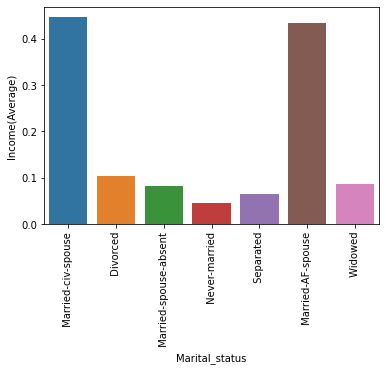

In [45]:
sns.barplot(x='Marital_status',y='IncomeLevel',data=df,ci=None)
plt.ylabel('Income(Average)')
plt.xticks(rotation=90)
plt.show()

Aroun 45% 0f Married-civ-spouse and Married-Af-spouse received >50K income

In [ ]:
### Occupation

In [46]:
pd.crosstab(df['Occupation'],df['Income'])

Income,<=50K,>50K
Occupation,,
?,1652,191
Adm-clerical,3262,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137


In [47]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

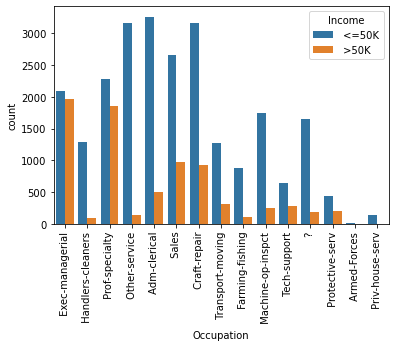

In [48]:
sns.countplot(df['Occupation'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

Adm-Clericalcount is highest,Priv-house-serv never received a pay >50k

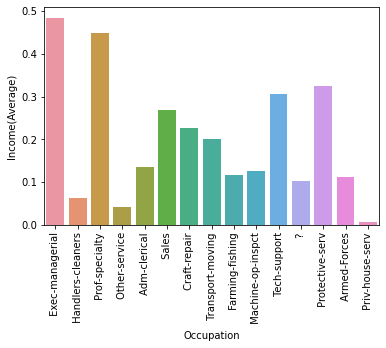

In [49]:
sns.barplot(x='Occupation',y='IncomeLevel',data=df,ci=None)
plt.ylabel('Income(Average)')
plt.xticks(rotation=90)
plt.show()

around 48% of Exex-managerial received >50K income followed Prof-speciality with 45% and Priv-house-serv almmost never received >50K

In [ ]:
### Relationship

In [50]:
pd.crosstab(df['Relationship'],df['Income'])

Income,<=50K,>50K
Relationship,,
Husband,7275,5918
Not-in-family,7448,856
Other-relative,944,37
Own-child,5001,67
Unmarried,3228,218
Wife,823,745


In [51]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

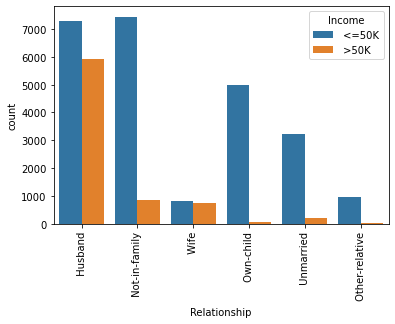

In [52]:
sns.countplot(df['Relationship'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

count of Husband and Not in family is highest

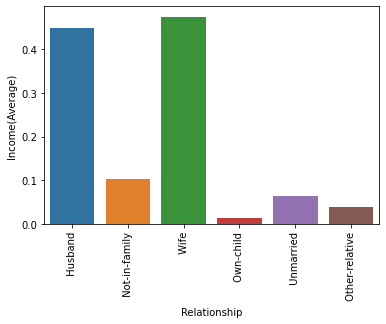

In [53]:
sns.barplot(x='Relationship',y='IncomeLevel',data=df,ci=None)
plt.ylabel('Income(Average)')
plt.xticks(rotation=90)
plt.show()

Employee in wife relationship has got around 50% chance that they receive >50k income follwed by husband which is 45%

In [ ]:
### Race

In [54]:
pd.crosstab(df['Race'],df['Income'])

Income,<=50K,>50K
Race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20698,7117


In [55]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

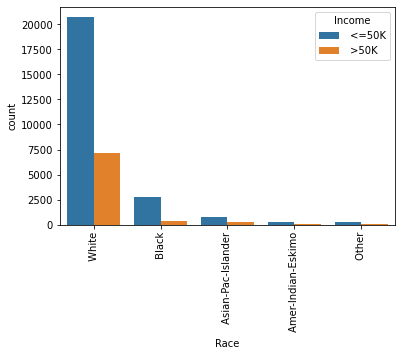

In [56]:
sns.countplot(df['Race'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

The count of white is more than the black

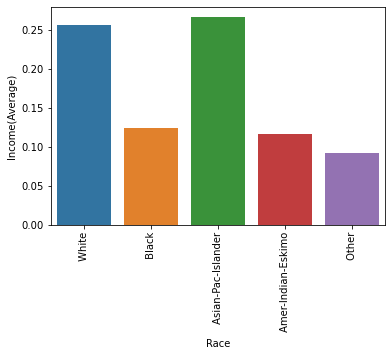

In [57]:
sns.barplot(x='Race',y='IncomeLevel',data=df,ci=None)
plt.ylabel('Income(Average)')
plt.xticks(rotation=90)
plt.show()

an average of around 30% of Asian-Pac-Islander received more than >50K income followed by white followed by black.

In [ ]:
### Sex

In [58]:
pd.crosstab(df['Sex'],df['Income'])

Income,<=50K,>50K
Sex,,
Female,9592,1179
Male,15127,6662


In [59]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

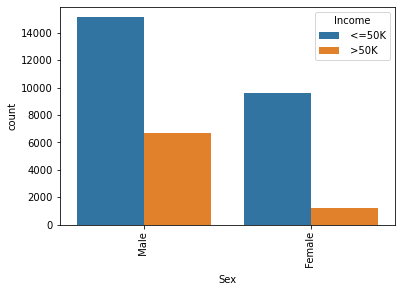

In [60]:
sns.countplot(df['Sex'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

Male count is more than female count

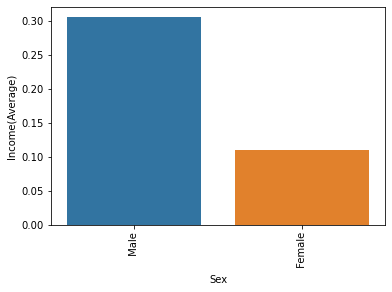

In [61]:
sns.barplot(x='Sex',y='IncomeLevel',data=df,ci=None)
plt.ylabel('Income(Average)')
plt.xticks(rotation=90)
plt.show()

On an average 30% of Male employees receive >50K and around 10% female employees receive >50K income

In [ ]:
### Native_country

In [62]:
pd.crosstab(df['Native_country'],df['Income'])

Income,<=50K,>50K
Native_country,,
?,437,146
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9


In [63]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

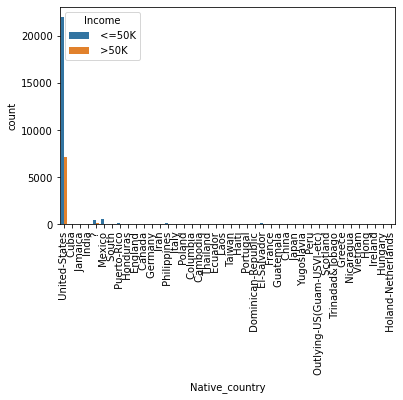

In [64]:
sns.countplot(df['Native_country'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

we see most of employees have native country as United-states followed by Cuba

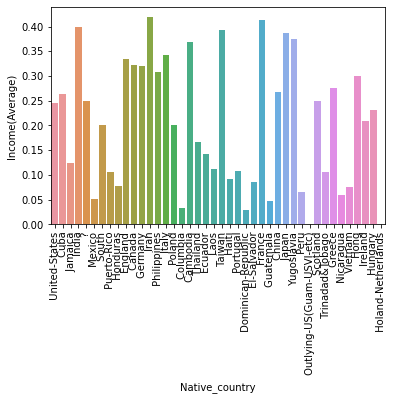

In [65]:
sns.barplot(x='Native_country',y='IncomeLevel',data=df,ci=None)
plt.ylabel('Income(Average)')
plt.xticks(rotation=90)
plt.show()

around anverage of 25% of United states native received >50K income.

## Numerical Columns









<AxesSubplot:xlabel='Age', ylabel='Density'>

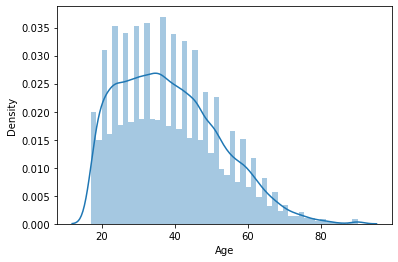

In [66]:
### Age
sns.distplot(df['Age'])

Age column is little rightly skewed

<AxesSubplot:xlabel='Age'>

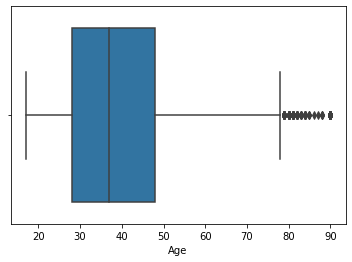

In [67]:
sns.boxplot(df['Age'])

most of the age spread between 28 to 48.And we that there a lot of outliers

In [ ]:
### Fnlwgt

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

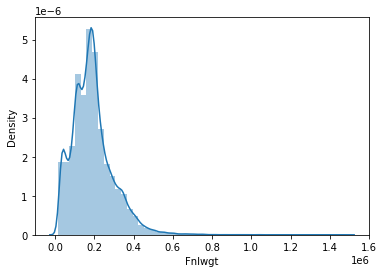

In [68]:
sns.distplot(df['Fnlwgt'])

In [ ]:
the Fnlwgt column is rightly skewed

<AxesSubplot:xlabel='Fnlwgt'>

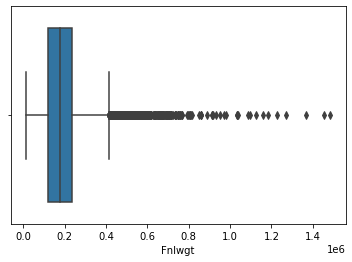

In [69]:
sns.boxplot(df['Fnlwgt'])

there alot of outliers in the data and need to be treated

In [ ]:
### Education_num

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

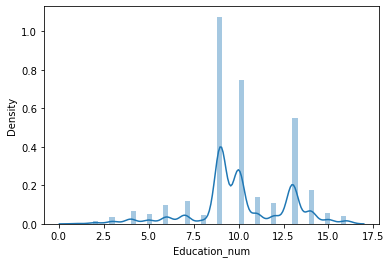

In [71]:
sns.distplot(df['Education_num'])

this column is very highly skewed

<AxesSubplot:xlabel='Education_num'>

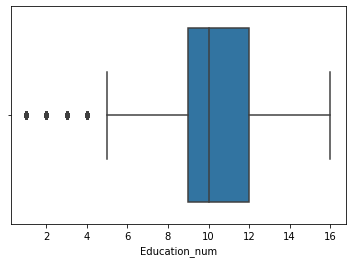

In [72]:
sns.boxplot(df['Education_num'])

most of the data spread between 9 and 12.There are few outliers also.

In [ ]:
### Capital_gain

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

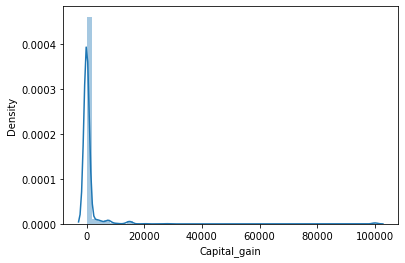

In [73]:
sns.distplot(df['Capital_gain'])

the column is rightly skewed

<AxesSubplot:xlabel='Capital_gain'>

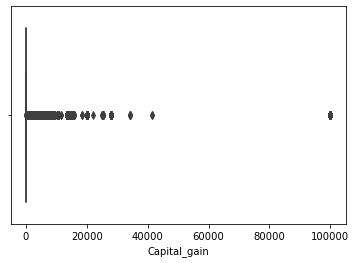

In [74]:
sns.boxplot(df['Capital_gain'])

there are alot of outliers.

In [ ]:
### Capital_loss

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

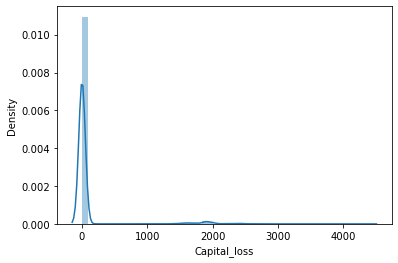

In [76]:
sns.distplot(df['Capital_loss'])

In [ ]:
the column is rightly skewed

<AxesSubplot:xlabel='Capital_loss'>

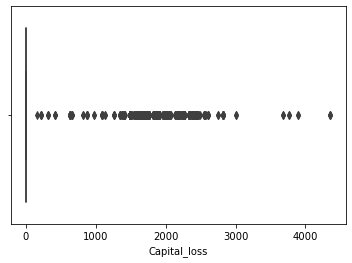

In [79]:
sns.boxplot(df['Capital_loss'])

there are alot of outliers and need to be removed

In [ ]:
### Hours_per_week

<AxesSubplot:xlabel='Hours_per_week'>

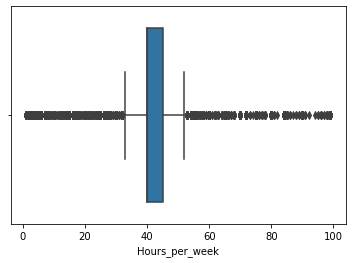

In [77]:
sns.boxplot(df['Hours_per_week'])

In [ ]:
there are alot of outliers

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

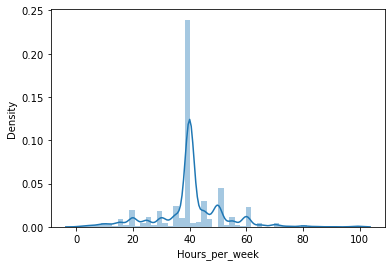

In [78]:
sns.distplot(df['Hours_per_week'])

## Multivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Age'>

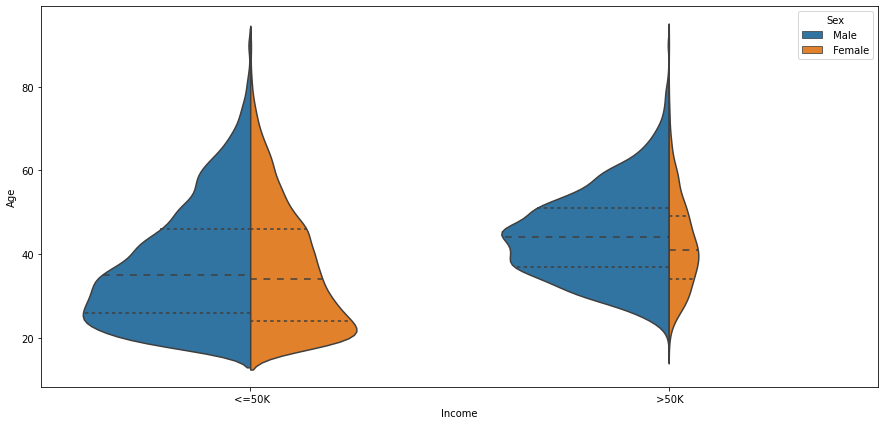

In [98]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Income", y="Age", hue="Sex",scale='count', split=True,inner="quartile",data=df)

Above violin plot shows us that male in any age group and income group have a higher number than their female counterparts.

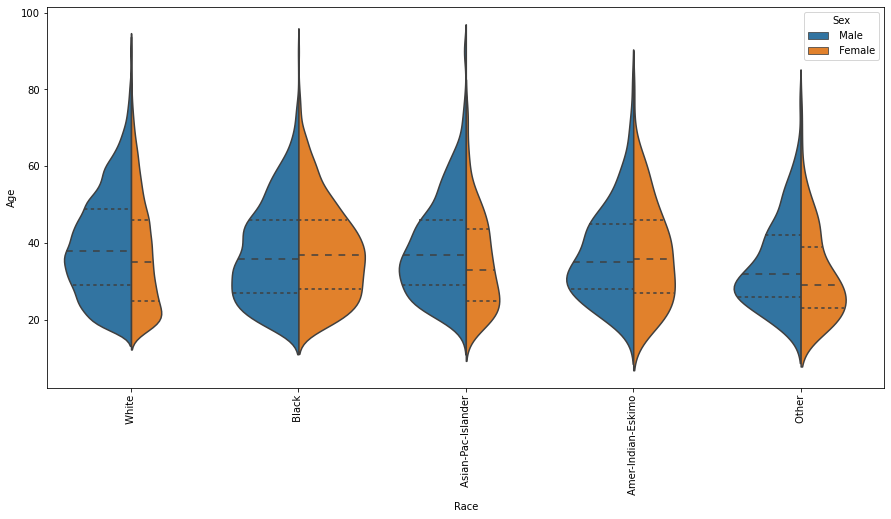

In [97]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Race", y="Age", hue="Sex",scale='count', split=True,inner="quartile",data=df)
plt.xticks(rotation=90)
plt.show()

Above violin plot shows us that female with black ethinicity of any age group is higher than the other ethinicity group females.

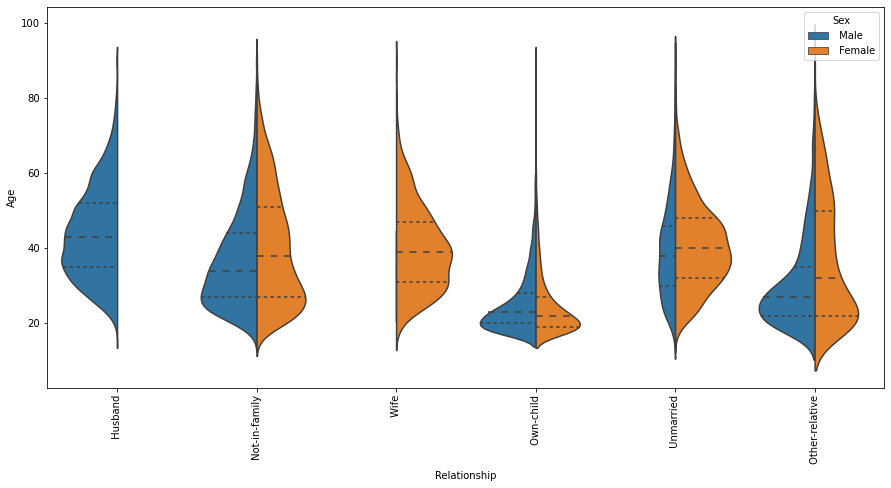

In [96]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Relationship", y="Age", hue="Sex",scale='count', split=True,inner="quartile",data=df)
plt.xticks(rotation=90)
plt.show()

 we have female who are unmarried more than the male counter parts

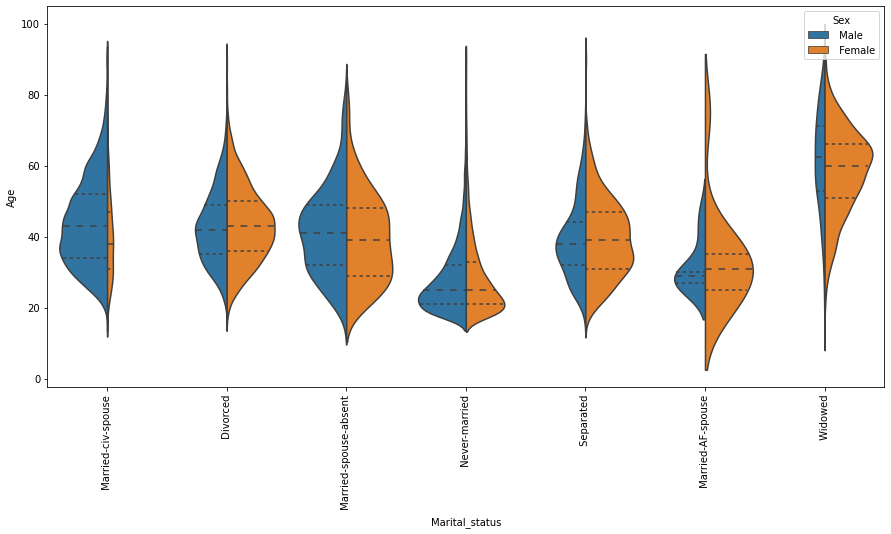

In [95]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Marital_status", y="Age", hue="Sex",scale='count', split=True,inner="quartile",data=df)
plt.xticks(rotation=90)
plt.show()

Above violin plot shows us that the marital status as married spouse have a higher number in male than in female and people who are widowed have a higher number in females as compared to the males.

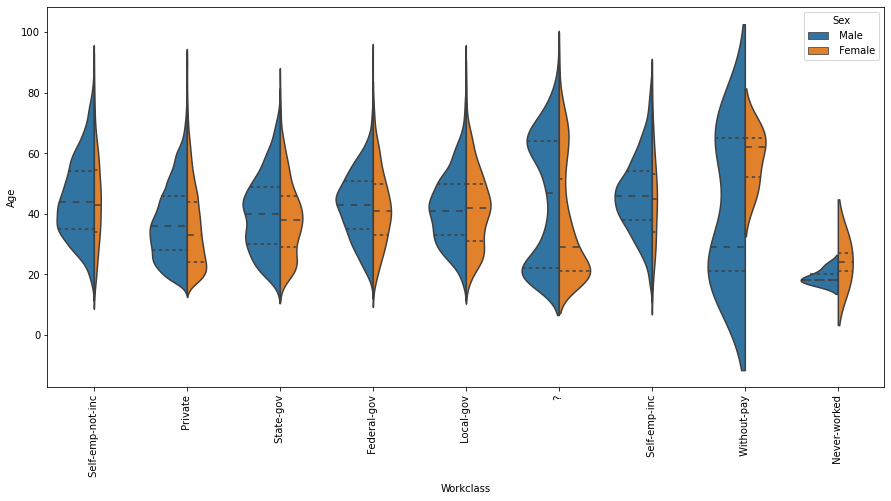

In [94]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Workclass", y="Age", hue="Sex",scale='count', split=True,inner="quartile",data=df)
plt.xticks(rotation=90)
plt.show()

Above violin plot shows us that male cover most of the working class sectors in each category as compared to the females.

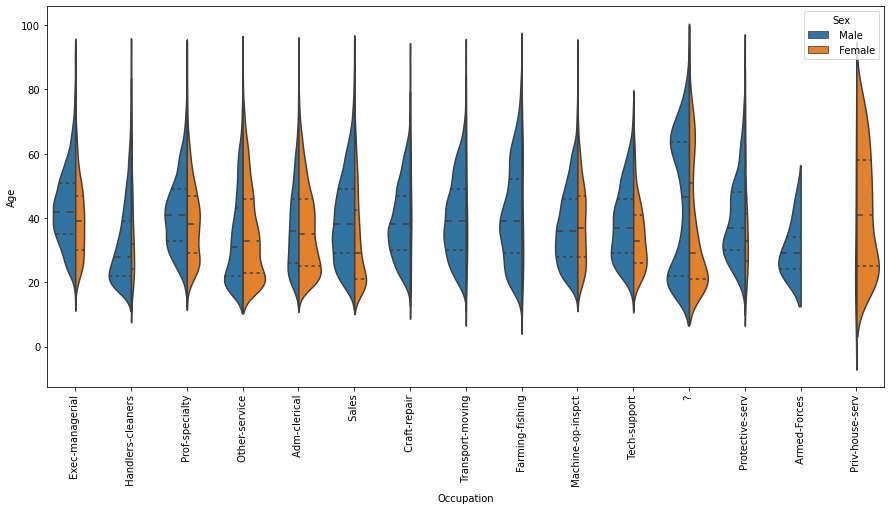

In [93]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex",scale='count', split=True,inner="quartile",data=df)
plt.xticks(rotation=90)
plt.show()

Above violin plot shows us that the designation of private house services has more number of female while occupations such as craft repair, transport moving, farming/fishing, protective/security service and armed forces have a larger number of data coverage for males.

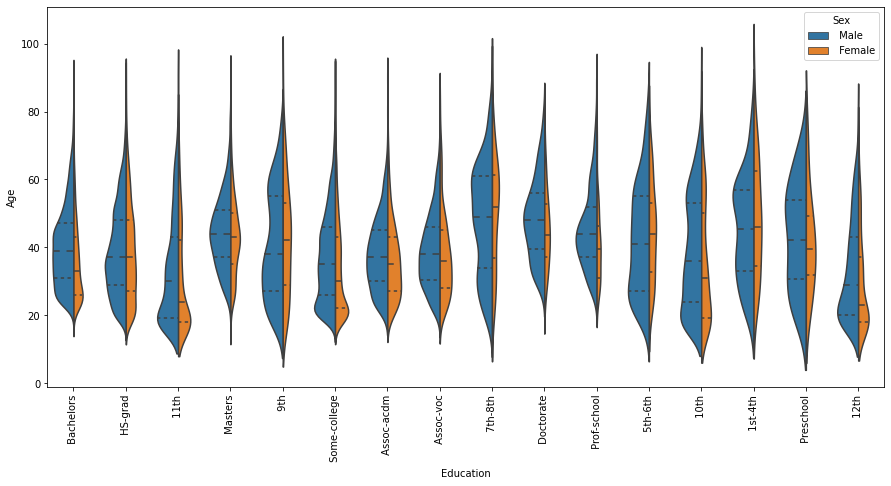

In [100]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Education", y="Age", hue="Sex",scale='count', split=True,inner="quartile",data=df)
plt.xticks(rotation=90)
plt.show()

Above violin plot shows us that just like the education number the education category sees more number of males than their female counter parts giving us a red flag on how female education is a concern.

# Replacing '?' in Workclass,Occupation,Native_country

In [101]:
df['Workclass'].mode()[0]

' Private'

In [102]:
df['Workclass'] = df['Workclass'].replace('?','Private')

In [103]:
df['Occupation'].mode()[0]

' Prof-specialty'

In [104]:
df['Occupation'] = df['Occupation'].replace('?','Prof-specialty')


In [105]:
df['Native_country'].mode()[0]


' United-States'

In [106]:
df['Native_country'] = df['Native_country'].replace('?','United-States')

# Feature Engineering

In [107]:
## Since in Eduaction category there are 16 type of categories,so will reduce it in some meaningful category.
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [112]:
df['Education']=df.Education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School',regex=True)
df['Education']=df.Education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher_education',regex=True)
df['Education'] =df.Education.replace('HS-grad','High School',regex=True)

In [113]:
df['Education'].value_counts()

 High School         10501
 higher_education    10316
 Bachelors            5354
 School               4253
 Masters              1723
 Doctorate             413
Name: Education, dtype: int64

In [114]:
## Marital Status:-
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [115]:
df['Marital_status'] =df['Marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married',regex=True)
df['Marital_status'] =df['Marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Other',regex=True)
df['Marital_status'] =df['Marital_status'].replace('Never-married','Not-married',regex=True)

In [116]:
df['Marital_status'].value_counts()

 Married        14999
 Not-married    10682
 Other           6879
Name: Marital_status, dtype: int64

In [117]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [119]:
## Income:-
df['Income']=df['Income'].replace('<=50K',0,regex=True)
df['Income']=df['Income'].replace('>50K',1,regex=True)

In [120]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,IncomeLevel
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0
1,38,Private,215646,High School,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
2,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0


In [128]:
df.drop('IncomeLevel',axis=1,inplace=True)

# Checking Correlation

In [129]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


<AxesSubplot:>

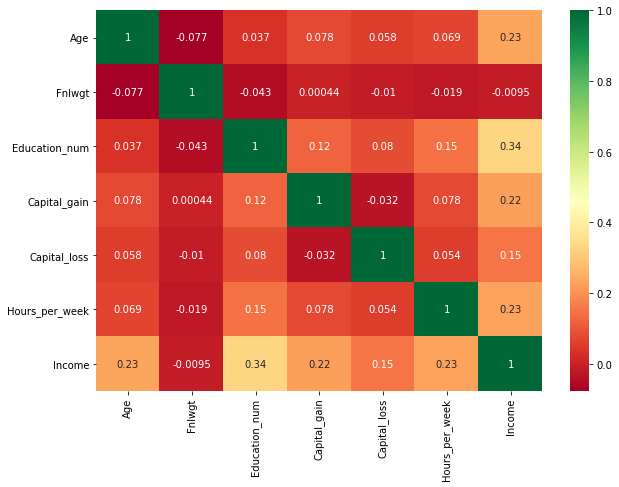

In [130]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

# Removing outliers using z-score

In [131]:
df_columns=df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]

In [132]:
z=np.abs(zscore(df_columns))

In [133]:
z

array([[0.83709708, 1.0087417 , 1.13477863, 0.14591373, 0.21666301,
        2.22212013],
       [0.04264043, 0.24504633, 0.42002663, 0.14591373, 0.21666301,
        0.03542999],
       [1.05703146, 0.42576955, 1.19742926, 0.14591373, 0.21666301,
        0.03542999],
       ...,
       [1.42358875, 0.3588108 , 0.42002663, 0.14591373, 0.21666301,
        0.03542999],
       [1.21562378, 0.11092744, 0.42002663, 0.14591373, 0.21666301,
        1.65520046],
       [0.98372   , 0.92986178, 0.42002663, 1.88840054, 0.21666301,
        0.03542999]])

In [134]:
new_df = df[(z<3).all(axis=1)]

In [135]:
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,High School,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [136]:
print(df.shape)
print(new_df.shape)

(32560, 15)
(29827, 15)


In [137]:
# percentage data loss
data_loss =((32560-29827)/32560)*100
data_loss

8.393734643734643

# Skewness

In [139]:
new_df.skew()

Age                0.491112
Fnlwgt             0.634168
Education_num     -0.170298
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Income             1.330372
dtype: float64

Fnlwgt,Capital_gain,Capital_loss are not in range of +/- 0.5.

In [142]:
skewed_cols = ["Fnlwgt","Capital_gain","Capital_loss"]

In [141]:
pt=PowerTransformer(method='yeo-johnson')

In [143]:
new_df[skewed_cols] = pt.fit_transform(new_df[skewed_features].values)

In [144]:
new_df.skew()

Age                0.491112
Fnlwgt            -0.034910
Education_num     -0.170298
Capital_gain       3.074074
Capital_loss      24.868849
Hours_per_week    -0.354170
Income             1.330372
dtype: float64

Capital_gain,Capital_loss are still having ver high skewness.In such cases tree based models can give good results.

# Encoding

In [145]:
columns = []
for column in new_df.columns:
    if new_df[column].dtype == object:
            columns.append(column)
columns

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [146]:
le=LabelEncoder()

In [148]:
new_df[columns]= new_df[columns].apply(le.fit_transform)

In [149]:
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,-1.113967,0,13,0,4,0,4,1,-0.296683,-0.040148,13,38,0
1,38,4,0.425203,2,9,2,6,1,4,1,-0.296683,-0.040148,40,38,0
2,53,4,0.605108,4,7,0,6,0,2,1,-0.296683,-0.040148,40,38,0
3,28,4,1.484491,0,13,0,10,5,2,0,-0.296683,-0.040148,40,5,0
4,37,4,1.046225,3,14,0,4,5,4,0,-0.296683,-0.040148,40,38,0


# Seperating features and Label

In [150]:
x = new_df.drop('Income',axis=1)
y = new_df['Income']

In [151]:
y.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

Data is not balanced in target column.

In [153]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [154]:
y.value_counts()

0    23173
1    23173
Name: Income, dtype: int64

In [155]:
x.shape, y.shape

((46346, 14), (46346,))

# Scaling the data

In [156]:
sc=StandardScaler()
scale_x=sc.fit_transform(x)
x=pd.DataFrame(scale_x,columns=x.columns)

In [157]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.786076,1.586179,-1.189762,-1.467986,0.996859,-0.719347,-0.645626,-0.714887,0.371576,0.629390,-0.380159,-0.033149,-2.65110,0.276887
1,-0.168331,0.119701,0.457655,-0.394544,-0.633361,2.012116,-0.165685,-0.095015,0.371576,0.629390,-0.380159,-0.033149,-0.14979,0.276887
2,1.024678,0.119701,0.650212,0.678898,-1.448470,-0.719347,-0.165685,-0.714887,-2.154249,0.629390,-0.380159,-0.033149,-0.14979,0.276887
3,-0.963671,0.119701,1.591441,-1.467986,0.996859,-0.719347,0.794198,2.384471,-2.154249,-1.588839,-0.380159,-0.033149,-0.14979,-4.153195
4,-0.247865,0.119701,1.122353,0.142177,1.404414,-0.719347,-0.645626,2.384471,0.371576,-1.588839,-0.380159,-0.033149,-0.14979,0.276887


# Train test splitting and model training

In [158]:
#tree based algorithms can give best results when the data is non gaussian
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  ",maxAccu," on Random_state ",maxRS)

Best accuracy is   0.8949942462600691  on Random_state  59


In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=59)

# KNeighborsClassifier

In [160]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))

0.8477416570771001
[[5450 1414]
 [ 703 6337]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      6864
           1       0.82      0.90      0.86      7040

    accuracy                           0.85     13904
   macro avg       0.85      0.85      0.85     13904
weighted avg       0.85      0.85      0.85     13904



# Support Vector Machine Classifier

In [161]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8438578826237054
[[5356 1508]
 [ 663 6377]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      6864
           1       0.81      0.91      0.85      7040

    accuracy                           0.84     13904
   macro avg       0.85      0.84      0.84     13904
weighted avg       0.85      0.84      0.84     13904



# DecisionTreeClassifier

In [163]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.846734752589183
[[5730 1134]
 [ 997 6043]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6864
           1       0.84      0.86      0.85      7040

    accuracy                           0.85     13904
   macro avg       0.85      0.85      0.85     13904
weighted avg       0.85      0.85      0.85     13904



# XGboost classifier

In [164]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
preddtc = xgb.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.8845655926352128
[[5903  961]
 [ 644 6396]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6864
           1       0.87      0.91      0.89      7040

    accuracy                           0.88     13904
   macro avg       0.89      0.88      0.88     13904
weighted avg       0.89      0.88      0.88     13904



# RandomForestClassifier

In [165]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.8940592635212888
[[5983  881]
 [ 592 6448]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6864
           1       0.88      0.92      0.90      7040

    accuracy                           0.89     13904
   macro avg       0.89      0.89      0.89     13904
weighted avg       0.89      0.89      0.89     13904



# AdaBoostClassifier

In [167]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
predadb = adb.predict(x_test)

print(accuracy_score(y_test, predadb))
print(confusion_matrix(y_test, predadb))
print(classification_report(y_test,predadb))

0.8468785960874569
[[5628 1236]
 [ 893 6147]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6864
           1       0.83      0.87      0.85      7040

    accuracy                           0.85     13904
   macro avg       0.85      0.85      0.85     13904
weighted avg       0.85      0.85      0.85     13904



# Cross Validation

In [169]:
cvs = cross_val_score(knc, x, y, cv=5)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())

Cross Validation of KNeighbors Classifier model  0.8480349119328409


In [170]:
cvs = cross_val_score(dtc, x, y, cv=5)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())

Cross Validation of DecisionTree Classifier model  0.8430509255719294


In [171]:
cvs = cross_val_score(svc, x, y, cv=5)
print("Cross Validation of Support Vector Machine Classifier model ",cvs.mean())

Cross Validation of Support Vector Machine Classifier model  0.8358225694142577


In [172]:
cvs = cross_val_score(rfc, x, y, cv=5)
print("Cross Validation of Random Forest Classifier model ",cvs.mean())

Cross Validation of Random Forest Classifier model  0.890584881015851


In [173]:
cvs = cross_val_score(adb, x, y, cv=5)
print("Cross Validation of Ada Boost Classifier model ",cvs.mean())

Cross Validation of Ada Boost Classifier model  0.8383685070102368


In [174]:
cvs = cross_val_score(xgb, x, y, cv=5)
print("Cross Validation of XG Boost Classifier model ",cvs.mean())

Cross Validation of XG Boost Classifier model  0.8728273305026801


Cross Validation score is maximum for Random Forest Classifier.

# HyperParameter Tuning


In [175]:
rfc = RandomForestClassifier()

In [176]:
parameters={'n_estimators' : [100,200],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10),
            'max_features':["auto","sqrt","log2"],
            }


In [177]:
gridsearch=GridSearchCV(rfc,parameters)

In [178]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [179]:

gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 200}

In [180]:
## Providing Best parameter to model:-
rfc = RandomForestClassifier(criterion='gini',n_estimators=200,max_features='auto',max_depth=9)
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
score = accuracy_score(y_test,predrfc)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Accuracy Score : 85.43584579976985
[[5426 1438]
 [ 587 6453]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      6864
           1       0.82      0.92      0.86      7040

    accuracy                           0.85     13904
   macro avg       0.86      0.85      0.85     13904
weighted avg       0.86      0.85      0.85     13904



# Plotting roc_auc_curve

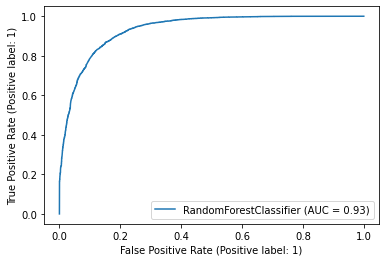

In [183]:
plot_roc_curve(rfc,x_test,y_test)

We are getting very good AUC score of 0.93

# Saving the model

In [184]:
joblib.dump(rfc,"CensusIncomePrediction.pkl")

['CensusIncomePrediction.pkl']